### Vehicle Price Prediction 

Prepared By: Swapnil Sharma

Data downloaded from kaggle, following is the information provided by kaggle
https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv


This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:


name

year - year when the car was bought 

selling_price

km_driven

fuel

seller_type

transmission

Owner- First Owner , second , third , fourth or above

### Objectives:
1 To review and understand the data

2 To perform Exploratory Data Analysis EDA

3 To prepare the data 

4 To split the data into Train and Test sets

5 To use an appropriate machine learing algorithm to predict the price of the vehicle

6 To evaluate the model

In [1]:
# Importing standard librarires first

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from dfply import *

### 1.Review and understand the data

In [2]:
# Load the data csv as a dataframe

cars = pd.read_csv(r"D:\machinelearning\PythonLibraries\data\cardatakaggle.csv")

In [3]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# lets do a priliminary review of the data

cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


So following 4 are the categorical variables:
Car_Name, Fuel_Type, Seller_Type, Transmission

remaining are numerical variables

Also all columns have 301 values ; hence no missing data is there ; however let's check this further

In [6]:
# Checking further for the null and na values

cars.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

so there is no missing or null data; hence we are ready to start the EDA

In [8]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 2. Perform EDA

In [9]:
# Lets check how  many unique car names do we have

cars_unique = cars['Car_Name'].unique()
cars_unique

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [10]:
len(cars_unique)

98

In [11]:
uncarspd = pd.DataFrame(cars_unique)

In [12]:
uncarspd.head()

,0
0,ritz
1,sx4
2,ciaz
3,wagon r
4,swift


In [13]:
cars['Car_Name'].value_counts()

city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Yamaha FZ S            1
800                    1
Bajaj Discover 100     1
TVS Sport              1
Hero Splender Plus     1
Name: Car_Name, Length: 98, dtype: int64

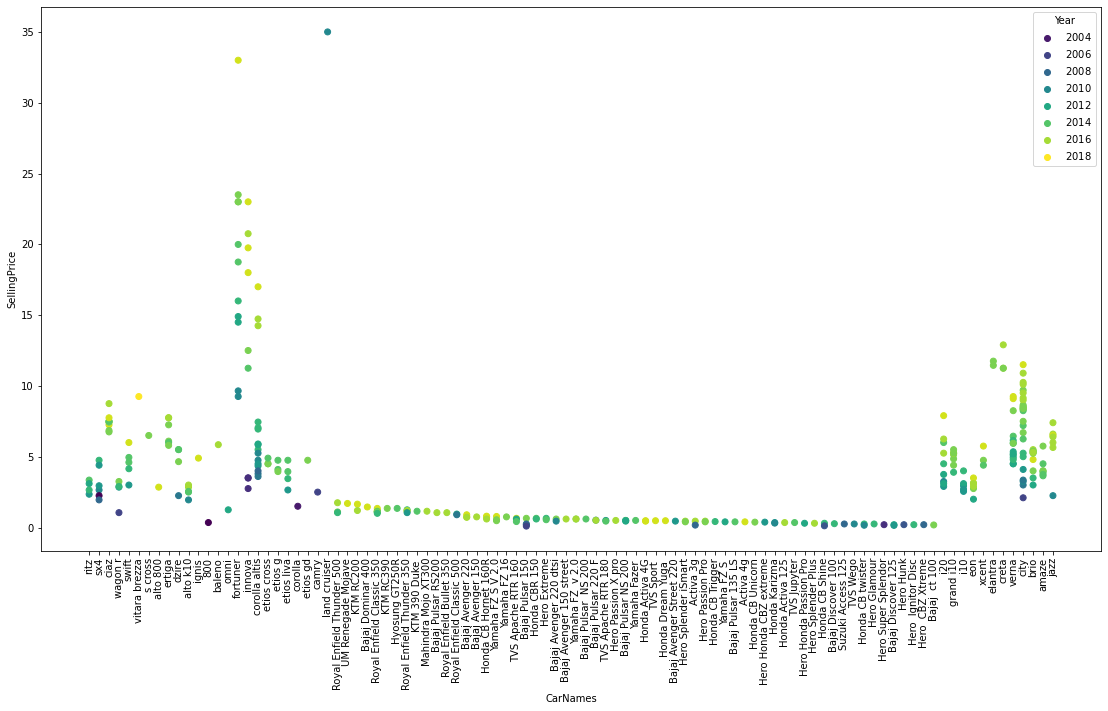

In [14]:
# 2.1 lets check variable 'Car_Name' is significant in 'Selling_Price'

fig, ax = plt.subplots(figsize=(19,10))
scatter = ax.scatter(cars['Car_Name'],cars['Selling_Price'],c=cars['Year'])
ax.legend(*scatter.legend_elements(),title='Year')
ax.set(xlabel='CarNames',
      ylabel='SellingPrice')
plt.xticks(rotation=90)
plt.show()

In [15]:
cars[cars['Car_Name'] == 'ritz']

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
30,ritz,2012,3.10,5.98,51439,Diesel,Dealer,Manual,0
31,ritz,2011,2.35,4.89,54200,Petrol,Dealer,Manual,0
46,ritz,2013,2.65,4.89,64532,Petrol,Dealer,Manual,0


In [16]:
# These are too many labels to analyse we will return to this later; however we do see that there are certain types of
# cars that have higher selling price and there is a relation between cars-name and selling price
# but thse are too many labels we may have to add labels like Make and car segment
# but we will look at this later

# lets continue the EDA with other variables vs Selling Price



In [17]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
# 2.2 Now lets check the Selling Price on the basis of the Year

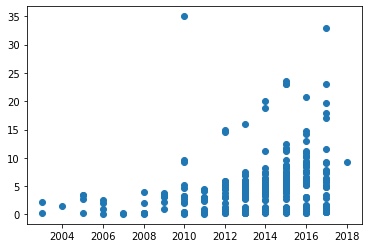

In [19]:
fig, ax = plt.subplots()
scatter = ax.scatter(cars['Year'],cars['Selling_Price'])

In [20]:
# we can see that most of the higher sellig price has been from 2010 onwards before that the Selling PRice was low
# infact the highest price was offered in Year 2010

In [21]:
# 2.3 lets check Selling PRice wrt to Present Price

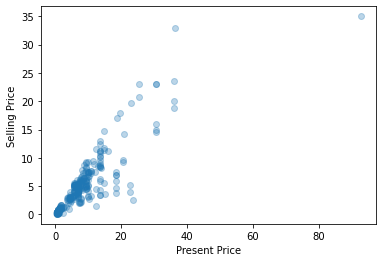

In [22]:
fig, ax = plt.subplots()
ax.scatter(cars['Present_Price'],cars['Selling_Price'],alpha=0.3)
ax.set(xlabel='Present Price',ylabel='Selling Price')
plt.show()

In [23]:
# very clearly the Present Price of the vehilcle is a signifant factor in selling Price
# its a linear relationship between Present Price and Selling Price
# this is a very strong and important relationship with this relationship we might not even need the carType variable
# for the first model


In [24]:
# Lets create a corelation matrix between Present PRice and Selling PRice
PP_SP = pd.DataFrame([cars['Present_Price'],cars['Selling_Price']])
ppsp=PP_SP.transpose()

In [25]:
ppsp.head(3)

,Present_Price,Selling_Price
0,5.59,3.35
1,9.54,4.75
2,9.85,7.25


In [26]:
corr_ppsp = ppsp.corr()
corr_ppsp

,Present_Price,Selling_Price
Present_Price,1.000000,0.878983
Selling_Price,0.878983,1.000000


In [27]:
cars.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [28]:
# 2.4 Lets check the relationship with the KmsDriven  

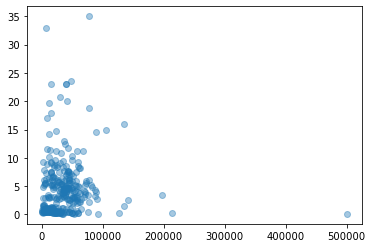

In [29]:
fig,ax = plt.subplots()
ax.scatter(cars['Kms_Driven'],cars['Selling_Price'],alpha = 0.4)
plt.show()

In [30]:
# Again we see that higher the kilometers the lower the price , that is price is not increasing with higher KMs

In [31]:
#2.5 Lets check the relationship with Fuel Type 

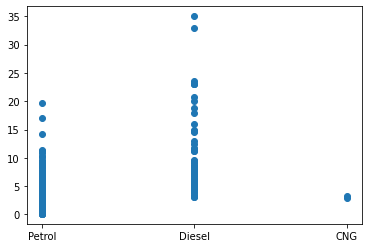

In [32]:
fig,ax = plt.subplots()
ax.scatter(cars['Fuel_Type'],cars['Selling_Price'])
plt.show()

In [33]:
# as we can see Disel cars have high Selling PRice in general


In [34]:
# 2.6 Lets check the relation between Seller Type with the selling price


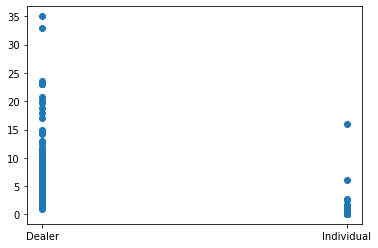

In [35]:
fig, ax = plt.subplots()
ax.scatter(cars['Seller_Type'],cars['Selling_Price'])

In [36]:
# we can see that Seller Type has a affect on Selling PRice 
# cars sold via Dealers are sold as a higher price

In [37]:
# 2.7 Lets check the effect of Transmissin on the selling price



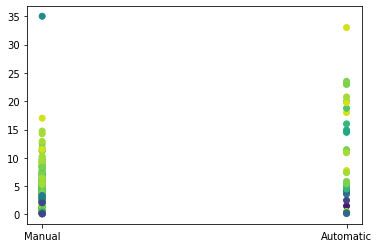

In [38]:
fig, ax = plt.subplots()
ax.scatter(cars['Transmission'],cars['Selling_Price'], c=cars['Year'])

In [39]:
# very slightly the automatic cars are Selling at a higher price

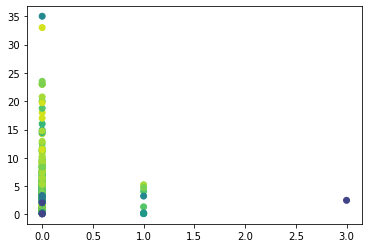

In [40]:
# 2.8 lets check the effect of Ownership on selling price

fig, ax = plt.subplots()
ax.scatter(cars['Owner'], cars['Selling_Price'], c=cars['Year'])

In [41]:
## very strong effect on Selling Price the first owner cars sell at a higher price

#### Significant attributes after EDA

we have seen that there are 98 unique models of vehicles available offcourse the vehicle's model affect the Selling Price of the vehicle a lot

However we have another variable 'Present Price' that is also highly corelated with the vehicle's model. The reasoning is that the car models that will sell for higher price will actually have a higher current price. Hence the effect of vehicle's model can be largely captured by using 'Present Price' of the vehicle 

Also we have seen the correlation matrix between Present Price and Selling Price 88%. This is a strong corelation. Hence we will drop vehicle's model in the initial model



In [42]:
y = cars['Selling_Price']

In [43]:
cars1 = cars.drop("Car_Name",axis=1)
cars1.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [44]:
cars1 = cars1.drop("Selling_Price",axis=1)
cars1.head(1)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0


In [45]:
y.head(3)

0    3.35
1    4.75
2    7.25
Name: Selling_Price, dtype: float64

###  3 Lets Prepare the data

In [46]:
# Lets perfom one hot encoding for Fueltype SellerType Transmisson
# Note Owner is already numerical and we are fine with it being Ordinal 

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


cat_attributes = ['Fuel_Type','Seller_Type',"Transmission"]

full_pipeline = ColumnTransformer([
    ("cat_name",OneHotEncoder(),cat_attributes)
],"passthrough")

cars1_transformed = full_pipeline.fit_transform(cars1)

D:\machinelearning\PythonLibraries\env\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass remainder=passthrough as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [48]:
cars_transformed = pd.DataFrame(cars1_transformed)

In [49]:
cars_transformed.head(1)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2014.0,5.59,27000.0,0.0


In [50]:
X = cars_transformed

#### 4. Split  the data into test and train

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score

In [52]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### 5. Lets use model RandomForestRegressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
reg = RandomForestRegressor()

In [55]:
reg.fit(X_train,y_train)

RandomForestRegressor()

In [56]:
reg.score(X_test,y_test)

0.9701970099853695

### Regression Model Evaluation Metrics
scikit learn evaluation score: https://scikit-learn.org/stable/modules/model_evaluation.html

1. r2 coefficent of determination
2. Mean absolute error
3. Mean squrared error

In [57]:
# lets check R2 score of the model
from sklearn.metrics import r2_score

In [58]:
y_pred = reg.predict(X_test)

In [59]:
r2_score(y_test,y_pred)

0.9701970099853695

In [60]:
df = pd.DataFrame({"category":['abc','bcd','cfe'],"value":[1,2,3]})

In [61]:
df

,category,value
0,abc,1
1,bcd,2
2,cfe,3


In [62]:
conditions = [
    (df['category']).str.contains('a'),
    (df['category']).str.contains('d'),
    (df['category']).str.contains('e')
]

updates = [
    'yes a is there',
    'yes d is there',
    'yes e is there'
]

In [63]:
array1=np.where(df['category'].str.contains('a'), "exists","does not exits")

In [64]:
array1

array(['exists', 'does not exits', 'does not exits'], dtype='<U14')

In [65]:
df['testing'] = np.select(conditions, updates)

In [66]:
df

,category,value,testing
0,abc,1,yes a is there
1,bcd,2,yes d is there
2,cfe,3,yes e is there


### Cross validation Score

In [67]:
cv_score = cross_val_score(reg,X,y,cv=5)

In [68]:
cv_score

array([ 0.96435388,  0.74749771, -1.54497373,  0.94991954,  0.80431   ])

In [69]:
reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [70]:
cv_score.mean()

0.38422147993121547

In [71]:
## lets check the performance on a neural network model

In [72]:
Xtr = X_train.values
ytr = y_train.values

In [73]:
import tensorflow as tf

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [76]:
neural = Sequential([
    Dense(4,activation='relu'),
    Dense(4,activation='relu'),
    Dense(1)
])

In [77]:
neural.compile(optimizer='rmsprop',loss='mse')

In [79]:
neural.fit(Xtr,ytr,epochs=50)

Epoch 1/50
8/8 [==============================] - 1s 2ms/step - loss: 12560296.7778
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 9520248.9444
Epoch 3/50
8/8 [==============================] - 0s 1ms/step - loss: 10912253.6667
Epoch 4/50
8/8 [==============================] - 0s 1ms/step - loss: 6526751.4444
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 4880942.9167
Epoch 6/50
8/8 [==============================] - 0s 982us/step - loss: 4202129.8333
Epoch 7/50
8/8 [==============================] - 0s 976us/step - loss: 3590294.4167
Epoch 8/50
8/8 [==============================] - 0s 1ms/step - loss: 2238652.0417
Epoch 9/50
8/8 [==============================] - 0s 1ms/step - loss: 1732668.3750
Epoch 10/50
8/8 [==============================] - 0s 945us/step - loss: 1260998.2778
Epoch 11/50
8/8 [==============================] - 0s 2ms/step - loss: 920284.8125
Epoch 12/50
8/8 [==============================] - 0s 2ms/step - loss: 647461.

In [80]:
y_pred_n = neural.predict(X_test)

In [81]:
r2_score(y_test,y_pred_n)

-0.8341169260231454

In [85]:
cv_score_n =cross_val_score(neural,Xtr,ytr)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002B9CF528730> does not.